In [4]:
from IPython.core.display import display, HTML

display(HTML('''
<style>
    /* 代码字体 */
    pre {
        font-family: "Consolas", "Monaco", "Courier New", monospace;
        font-size: 14px;
    }

    /* 代码背景 */
    .jp-CodeCell {
        background: #f6f8fa !important;  /* GitHub 代码块背景色 */
        border-radius: 6px;
        padding: 10px;
    }

    /* 代码高亮 */
    .jp-OutputArea pre {
        color: #24292e !important;  /* GitHub 代码文本颜色 */
    }

    /* 代码行号 */
    .CodeMirror-linenumber {
        color: #6a737d !important;
    }
</style>
'''))


# 3.16第一次更新

- 未来50年内发生日食的时间：https://nadc.china-vo.org/eclipse/

## 一个比较简单的Python代码

- 原理：
  - 这段Python代码由ChatGPT给出，直接使用了skyfield数据包，包内有以地球为中心的太阳、月球视位置数据。
  - 日食判定标准是：太阳与月球的视位置相差3度以内
  - 代码从2025.01.01开始检测比较日月视位置差
- 问题：
  - 第一类错误：有些日期实际没有发生日食，这是因为我们的视位角差取得太大了
  - 第二类错误：有些实际发生日食的日期没有记录，这是因为检测时间跨度取得太大了

In [25]:
!pip install skyfield
!pip install matplotlib
!pip install numpy
!pip install datetime

Predicted solar eclipse: 2025-02-28 00:00:00+00:00
Predicted solar eclipse: 2025-09-22 00:00:00+00:00
Predicted solar eclipse: 2026-03-19 00:00:00+00:00
Predicted solar eclipse: 2026-09-11 00:00:00+00:00
Predicted solar eclipse: 2027-12-28 00:00:00+00:00
Predicted solar eclipse: 2028-07-22 00:00:00+00:00
Predicted solar eclipse: 2028-12-16 00:00:00+00:00
Predicted solar eclipse: 2029-06-12 00:00:00+00:00
Predicted solar eclipse: 2030-01-04 00:00:00+00:00
Predicted solar eclipse: 2030-06-01 00:00:00+00:00
Predicted solar eclipse: 2030-07-01 00:00:00+00:00
Predicted solar eclipse: 2031-06-20 00:00:00+00:00
Predicted solar eclipse: 2031-11-15 00:00:00+00:00
Predicted solar eclipse: 2032-04-10 00:00:00+00:00
Predicted solar eclipse: 2032-11-03 00:00:00+00:00
Predicted solar eclipse: 2033-04-29 00:00:00+00:00
Predicted solar eclipse: 2034-02-19 00:00:00+00:00
Predicted solar eclipse: 2035-03-10 00:00:00+00:00
Predicted solar eclipse: 2035-09-02 00:00:00+00:00
Predicted solar eclipse: 2036-0

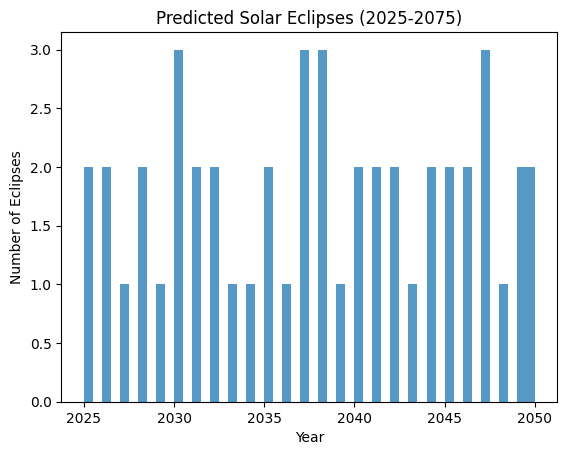

In [26]:
from skyfield.api import load
from skyfield.framelib import ecliptic_frame
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 加载星历数据
eph = load('de421.bsp')
sun, moon, earth = eph['sun'], eph['moon'], eph['earth']

# 计算未来 50 年的日食
start_year, end_year = 2025, 2050
ts = load.timescale()

solar_eclipses = []

for year in range(start_year, end_year + 1):
    for month in range(1, 13):  # 每个月
        t = ts.utc(year, month, 1)
        t_end = ts.utc(year, month + 1, 1) if month < 12 else ts.utc(year + 1, 1, 1)

        while t.tt < t_end.tt:
            earth_moon = earth.at(t).observe(moon)
            earth_sun = earth.at(t).observe(sun)

            elongation = earth_sun.apparent().separation_from(earth_moon.apparent())

            if elongation.degrees < 3:  # 近似判断日食发生
                solar_eclipses.append(t.utc_datetime())

            t = ts.utc(t.utc_datetime() + timedelta(days=1))

# 打印预测的日食时间
for eclipse in solar_eclipses:
    print(f"Predicted solar eclipse: {eclipse}")

# 可视化（简化版，不画完整日食路径）
plt.hist([eclipse.year for eclipse in solar_eclipses], bins=50, alpha=0.75)
plt.xlabel("Year")
plt.ylabel("Number of Eclipses")
plt.title("Predicted Solar Eclipses (2025-2075)")
plt.show()

- 以下为一个改进版的代码，它精确到了2小时，并且能成功预测2025-2026年的四次日食：

In [27]:
solar_eclipses1 = []
for year in range(2025, 2027):
    for month in range(1, 13):  # 每个月
        t = ts.utc(year, month, 1, 0)
        t_end = ts.utc(year, month + 1, 1, 0) if month < 12 else ts.utc(year + 1, 1, 1, 0)

        while t.tt < t_end.tt:
            earth_moon = earth.at(t).observe(moon)
            earth_sun = earth.at(t).observe(sun)
            elongation = earth_sun.apparent().separation_from(earth_moon.apparent())

            if elongation.degrees < 1.5:  # 近似判断日食发生
                solar_eclipses1.append(t.utc_datetime())
                ra1, dec1, distance1 = earth_sun.apparent().radec()
                ra2, dec2, distance2 = earth_moon.apparent().radec()
                print(f'time: {t.utc_iso()}, ra1: {ra1}, dec1: {dec1}, ra2: {ra2},', '\n', f'dec2: {dec2}, elongation: {elongation.degrees}')
                break;

            t = ts.utc(t.utc_datetime() + timedelta(hours=2))

# 打印预测的日食时间
for eclipse in solar_eclipses1:
    print(f"Predicted solar eclipse: {eclipse}")

time: 2025-03-29T10:00:00Z, ra1: 00h 31m 38.00s, dec1: +03deg 24' 46.4", ra2: 00h 27m 57.28s, 
 dec2: +04deg 06' 56.0", elongation: 1.1558207554020792
time: 2025-09-21T18:00:00Z, ra1: 11h 55m 02.31s, dec1: +00deg 32' 16.5", ra2: 11h 50m 18.50s, 
 dec2: +00deg 04' 35.4", elongation: 1.2693685226498062
time: 2026-02-17T10:00:00Z, ra1: 22h 02m 08.46s, dec1: -12deg 02' 13.0", ra2: 21h 59m 39.83s, 
 dec2: -13deg 21' 18.1", elongation: 1.4499375971747088
time: 2026-08-12T16:00:00Z, ra1: 09h 28m 02.23s, dec1: +14deg 56' 24.2", ra2: 09h 25m 44.45s, 
 dec2: +16deg 09' 28.0", elongation: 1.3374226337873476
Predicted solar eclipse: 2025-03-29 10:00:00+00:00
Predicted solar eclipse: 2025-09-21 18:00:00+00:00
Predicted solar eclipse: 2026-02-17 10:00:00+00:00
Predicted solar eclipse: 2026-08-12 16:00:00+00:00


- 显然我们可以将其推广至2075，但是datetime数据库可能只到2050

- 以上针对数据库搜寻建模的方式，如果物理的方式的没有搞出来，可以使用这种策略保底


## 误差的估计
- （蒋弘杰讨论）
- 结论：可以建模成带外场的二体问题
- 可能忽略其他行星的影响？


## 项目蓝图（GPT）

构思：请你帮我用python和.ipynb写一个project，建立一个3D模型，预测50年内的日食与月食，要求系统依照物理规律描绘天体之间的运动，并依据运动结果反馈日食/月食的时间
输入：2025年1月1日的太阳、地球、月球、金星、木星的位置，保持太阳在原点（你需要介绍取得这些数据的途径）
可以忽略：其他行星的影响，相对论效应
模型需要以小时为单位
可以创建新类/定义新函数
请你简要说明，并给出一个蓝图



### **项目构思**
本项目的目标是使用 Python 和 Jupyter Notebook 构建一个 3D 动力学模型，以模拟太阳、地球、月球、金星和木星的运动，并预测未来 50 年内的日食与月食。

---

### **数据获取**
为了获取 2025 年 1 月 1 日的初始天体位置，我们可以使用以下几种方式：
1. **NASA Horizons API**：提供天体轨道和状态向量数据。
2. **SPICE (NASA NAIF)**：一个强大的库，可获取精确的天体轨道信息。
3. **Skyfield**（Python 库）：基于 JPL DE 精度表获取行星位置。
4. **Astropy**（Python 库）：提供天文计算工具，包括行星轨道数据。

我们可以选用 Skyfield 库，因为它使用 JPL DE 精度表，较为便捷。

---

### **模型核心逻辑**
1. **定义坐标系**
   - 太阳固定在原点 (0,0,0)。
   - 使用三维直角坐标系 (x, y, z) 来表示天体的位置。

2. **引力模型**
   - 采用牛顿引力定律计算地球、月球、金星、木星的运动：
     \[
     F = \frac{G m_1 m_2}{r^2}
     \]
   - 使用牛顿运动定律计算加速度：
     \[
     a = \frac{F}{m}
     \]
   - 通过数值积分（如 Runge-Kutta 方法）求解运动方程。

3. **模拟时间步长**
   - 以**1 小时**为单位进行计算。

4. **日食与月食判定**
   - **日食条件**：
     - 月球位于地球和太阳之间，且月球的投影落在地球上。
   - **月食条件**：
     - 地球位于太阳和月球之间，且月球进入地球的本影或半影区域。

---

### **蓝图**
1. **数据获取**
   - 使用 Skyfield 获取 2025 年 1 月 1 日的天体初始位置。

2. **建立天体类**
   - 创建 `CelestialBody` 类，包含质量、位置、速度等属性。

3. **定义运动方程**
   - 计算天体之间的引力。
   - 使用数值方法（Runge-Kutta）求解运动方程。

4. **构建 3D 可视化**
   - 使用 Matplotlib 绘制 3D 轨道。
   - 动态显示天体运动。

5. **日食/月食检测**
   - 实时监测天体位置，判断日食和月食发生的时间。

6. **运行仿真**
   - 计算未来 50 年内（按小时步进）的轨道演化，并输出日食/月食的时间点。

---

**下一步**
我可以先给你一个基本的 Jupyter Notebook 代码框架，你可以运行后再优化细节。你希望先实现哪个部分？

数据获取

### **数据获取方法**
我们将使用 **Skyfield** 库来获取 2025 年 1 月 1 日的天体位置数据。Skyfield 基于 JPL DE 精度表，能够计算行星和月球的位置，并提供高精度的天文计算工具。

#### **步骤**
1. 安装 Skyfield：
   ```bash
   pip install skyfield
   ```
2. 导入 Skyfield 并加载 JPL 行星数据 (`de421.bsp` 或 `de430t.bsp`)。
3. 获取 2025 年 1 月 1 日 00:00 UTC 时的太阳、地球、月球、金星、木星的位置。

---

### **代码实现**
下面的 Python 代码会获取 2025 年 1 月 1 日的天体位置（单位：天文单位 AU）。

```python
from skyfield.api import load

# 加载 JPL DE 精度表
ephemeris = load('de421.bsp')

# 获取天体对象
sun = ephemeris['sun']
earth = ephemeris['earth']
moon = ephemeris['moon']
venus = ephemeris['venus']
jupiter = ephemeris['jupiter barycenter']  # 木星的质心

# 设定时间为 2025 年 1 月 1 日 00:00 UTC
ts = load.timescale()
t = ts.utc(2025, 1, 1, 0, 0, 0)

# 计算相对于太阳的坐标 (单位：AU)
earth_pos = earth.at(t).observe(sun).position.km / 1.496e+8  # AU
moon_pos = moon.at(t).observe(sun).position.km / 1.496e+8
venus_pos = venus.at(t).observe(sun).position.km / 1.496e+8
jupiter_pos = jupiter.at(t).observe(sun).position.km / 1.496e+8

# 打印初始位置
print(f"Earth Position (AU): {earth_pos}")
print(f"Moon Position (AU): {moon_pos}")
print(f"Venus Position (AU): {venus_pos}")
print(f"Jupiter Position (AU): {jupiter_pos}")
```

---

### **解析**
1. **数据源**：我们使用 `de421.bsp`，它提供行星和月球的轨道数据。
2. **时间设定**：使用 `ts.utc(2025, 1, 1, 0, 0, 0)` 设定时间为 2025 年 1 月 1 日 00:00 UTC。
3. **坐标计算**：
   - `earth.at(t).observe(sun).position.km` 计算地球相对于太阳的坐标，并转换为 AU。
   - 同理，计算月球、金星、木星的坐标。
4. **输出结果**：打印天体在 2025 年 1 月 1 日的初始位置。

---

### **下一步**
你可以运行这个代码，获取天体的初始位置数据。接下来，我们可以：
- **建立 `CelestialBody` 类**，封装质量、位置、速度等信息。
- **定义运动方程**，计算天体的轨道演化。

你希望先实现哪一部分？

建立类

### **建立 `CelestialBody` 类**
我们需要一个 `CelestialBody`（天体）类来存储天体的基本属性，包括：
- **名称**（`name`）
- **质量**（`mass`，单位 kg）
- **当前位置**（`position`，单位 AU，3D 坐标）
- **速度**（`velocity`，单位 AU/h，3D 速度向量）

---

### **代码实现**
```python
import numpy as np

class CelestialBody:
    def __init__(self, name, mass, position, velocity):
        """
        初始化天体
        :param name: 天体名称 (str)
        :param mass: 质量 (kg)
        :param position: 初始位置 (numpy 数组, 单位 AU)
        :param velocity: 初始速度 (numpy 数组, 单位 AU/h)
        """
        self.name = name
        self.mass = mass
        self.position = np.array(position, dtype=np.float64)
        self.velocity = np.array(velocity, dtype=np.float64)

    def update_position(self, dt):
        """
        根据当前速度更新位置
        :param dt: 时间步长 (小时)
        """
        self.position += self.velocity * dt

    def apply_force(self, force, dt):
        """
        根据合力计算速度变化
        :param force: 作用力 (numpy 数组, 单位 N)
        :param dt: 时间步长 (小时)
        """
        acceleration = force / self.mass  # a = F / m
        self.velocity += acceleration * dt * 3600  # 3600 秒 = 1 小时

    def __str__(self):
        return f"{self.name}: pos={self.position}, vel={self.velocity}"
```

---

### **类的功能**
1. **初始化天体**
   - `position` 和 `velocity` 是 3D 向量，使用 NumPy 数组存储。
   - `mass` 以 kg 为单位，便于计算引力。

2. **`update_position(dt)`**
   - 计算在 `dt` 小时后的位置：
     \[
     r_{\text{new}} = r_{\text{old}} + v \cdot dt
     \]

3. **`apply_force(force, dt)`**
   - 计算天体在 `dt` 小时内因力的作用而发生的速度变化：
     \[
     a = \frac{F}{m}, \quad v_{\text{new}} = v_{\text{old}} + a \cdot dt
     \]
   - 由于 `dt` 以小时为单位，我们需要将 `dt` 转换为秒（乘以 3600）。

---

### **测试代码**
```python
# 太阳质量 (kg)
SUN_MASS = 1.989e30  

# 假设地球初始位置 (AU) 和速度 (AU/h)
earth = CelestialBody(
    name="Earth",
    mass=5.972e24,
    position=[1.0, 0.0, 0.0],  # 1 AU 处
    velocity=[0.0, 29.78 / 149597870.7, 0.0]  # AU/h (地球公转速度 29.78 km/s)
)

print(earth)

# 模拟 1 小时后的位置
earth.update_position(1)
print("After 1 hour:", earth)
```

---

### **下一步**
现在我们有了 `CelestialBody` 类，接下来我们需要：
1. **计算天体之间的引力**（使用牛顿引力公式）。
2. **实现数值积分方法**（如 Runge-Kutta），求解轨道运动。

你希望我们先实现哪一步？

数值积分方法

### **数值积分方法：Runge-Kutta (RK4)**
为了精确模拟天体的运动，我们需要求解**牛顿运动方程**：
\[
F = \frac{G m_1 m_2}{r^2}
\]
\[
a = \frac{F}{m}
\]
\[
\frac{d\mathbf{v}}{dt} = \mathbf{a}, \quad \frac{d\mathbf{r}}{dt} = \mathbf{v}
\]
这是一组**二阶微分方程**，我们使用 **四阶 Runge-Kutta 方法（RK4）** 进行数值积分。

---

### **RK4 公式**
RK4 方法可以求解：
\[
\frac{d y}{dt} = f(y, t)
\]
具体步骤：
1. 计算 4 个中间量：
   \[
   k_1 = f(y_n, t_n) \cdot dt
   \]
   \[
   k_2 = f(y_n + \frac{k_1}{2}, t_n + \frac{dt}{2}) \cdot dt
   \]
   \[
   k_3 = f(y_n + \frac{k_2}{2}, t_n + \frac{dt}{2}) \cdot dt
   \]
   \[
   k_4 = f(y_n + k_3, t_n + dt) \cdot dt
   \]
2. 计算最终更新量：
   \[
   y_{n+1} = y_n + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6}
   \]

在天体模拟中，我们需要用 RK4 方法同时更新**位置和速度**。

---

### **实现 RK4**
```python
import numpy as np

G = 6.67430e-11  # 引力常数 (m^3 kg^-1 s^-2)
AU = 1.496e+11  # 1 AU = 149,597,870.7 km (单位：m)
DAY_TO_HOUR = 24  # 1 天 = 24 小时
HOUR_TO_SEC = 3600  # 1 小时 = 3600 秒

def compute_gravitational_force(body1, body2):
    """
    计算 body1 受到 body2 引力的作用力
    :param body1: CelestialBody 对象
    :param body2: CelestialBody 对象
    :return: 力 (numpy 数组，单位 N)
    """
    r_vec = body2.position - body1.position
    r_mag = np.linalg.norm(r_vec)
    
    if r_mag == 0:
        return np.array([0.0, 0.0, 0.0])  # 避免除零错误
    
    force_mag = G * body1.mass * body2.mass / r_mag**2
    force_vec = force_mag * (r_vec / r_mag)  # 归一化方向
    return force_vec

def acceleration(bodies, body):
    """
    计算给定天体 body 受所有其他天体的引力加速度
    :param bodies: 所有天体列表
    :param body: 目标天体
    :return: 加速度 (numpy 数组, AU/h^2)
    """
    total_force = np.array([0.0, 0.0, 0.0])
    
    for other in bodies:
        if other != body:
            total_force += compute_gravitational_force(body, other)
    
    # 加速度 a = F / m
    acc = total_force / body.mass  # 单位 m/s^2
    return acc * (HOUR_TO_SEC**2) / AU  # 转换为 AU/h^2

def rk4_step(bodies, dt):
    """
    使用 RK4 方法更新所有天体的位置和速度
    :param bodies: 天体列表
    :param dt: 时间步长 (小时)
    """
    initial_states = []
    
    # 记录初始状态
    for body in bodies:
        initial_states.append((body.position.copy(), body.velocity.copy()))
    
    # 计算 k1
    k1_v = []
    k1_r = []
    for body in bodies:
        acc = acceleration(bodies, body)
        k1_v.append(acc * dt)  # dv = a * dt
        k1_r.append(body.velocity * dt)  # dr = v * dt
    
    # 计算 k2
    k2_v = []
    k2_r = []
    for i, body in enumerate(bodies):
        body.position = initial_states[i][0] + k1_r[i] / 2
        body.velocity = initial_states[i][1] + k1_v[i] / 2
        acc = acceleration(bodies, body)
        k2_v.append(acc * dt)
        k2_r.append(body.velocity * dt)
    
    # 计算 k3
    k3_v = []
    k3_r = []
    for i, body in enumerate(bodies):
        body.position = initial_states[i][0] + k2_r[i] / 2
        body.velocity = initial_states[i][1] + k2_v[i] / 2
        acc = acceleration(bodies, body)
        k3_v.append(acc * dt)
        k3_r.append(body.velocity * dt)
    
    # 计算 k4
    k4_v = []
    k4_r = []
    for i, body in enumerate(bodies):
        body.position = initial_states[i][0] + k3_r[i]
        body.velocity = initial_states[i][1] + k3_v[i]
        acc = acceleration(bodies, body)
        k4_v.append(acc * dt)
        k4_r.append(body.velocity * dt)
    
    # 更新位置和速度
    for i, body in enumerate(bodies):
        body.position = initial_states[i][0] + (k1_r[i] + 2*k2_r[i] + 2*k3_r[i] + k4_r[i]) / 6
        body.velocity = initial_states[i][1] + (k1_v[i] + 2*k2_v[i] + 2*k3_v[i] + k4_v[i]) / 6
```

---

### **测试 RK4 方法**
```python
# 定义太阳和地球
sun = CelestialBody(
    name="Sun",
    mass=1.989e30,  # kg
    position=[0.0, 0.0, 0.0],  # 太阳固定在原点
    velocity=[0.0, 0.0, 0.0]
)

earth = CelestialBody(
    name="Earth",
    mass=5.972e24,  # kg
    position=[1.0, 0.0, 0.0],  # 1 AU
    velocity=[0.0, 29.78 / 149597870.7 * 3600, 0.0]  # AU/h
)

bodies = [sun, earth]

# 运行 1 天的仿真 (24 小时)
for _ in range(DAY_TO_HOUR):
    rk4_step(bodies, 1)

# 输出更新后的地球位置
print(f"Earth Position after 1 day: {earth.position}")
```

---

### **总结**
1. **`compute_gravitational_force(body1, body2)`**：计算引力。
2. **`acceleration(bodies, body)`**：计算给定天体的加速度。
3. **`rk4_step(bodies, dt)`**：
   - 计算 `k1` 到 `k4`
   - 用 RK4 方法更新**位置和速度**
4. **测试代码**：
   - 运行 1 天，检查地球位置变化。

---

### **下一步**
现在我们已经实现了 RK4 轨道模拟，接下来可以：
1. **可视化天体轨道（3D 绘图）**
2. **检测日食和月食事件**

你希望先做哪部分？😊

检测日食与月食

### **检测日食与月食**
现在我们已经实现了 RK4 方法来模拟天体运动，下一步是**检测日食和月食**。

#### **定义日食和月食**
1. **日食 (Solar Eclipse)**：当**月球遮挡太阳**时，发生日食，即：
   \[
   \text{地球、月球、太阳基本在一条直线上，且月球位于地球和太阳之间}
   \]
   - 需要计算**太阳-地球-月球**的角度。
   - 当夹角接近 0° 时，可能发生日食。

2. **月食 (Lunar Eclipse)**：当**地球遮挡太阳光**，使得月球进入地球的影子时，发生月食，即：
   \[
   \text{太阳、地球、月球在一条直线上，且地球位于太阳和月球之间}
   \]
   - 同样计算**太阳-地球-月球的夹角**，并检查月球是否进入地球的影子范围。

---

### **计算方法**
我们使用**向量方法**判断三者是否在一条直线上：
- 计算**地月向量** $\mathbf{R_{EM}} = \mathbf{R_M} - \mathbf{R_E}$
- 计算**地日向量** $\mathbf{R_{ES}} = \mathbf{R_S} - \mathbf{R_E}$
- 计算两者夹角 $\theta$：
  \[
  \cos\theta = \frac{\mathbf{R_{EM}} \cdot \mathbf{R_{ES}}}{|\mathbf{R_{EM}}| |\mathbf{R_{ES}}|}
  \]
- 如果 $\theta \approx 0°$，可能发生**日食**。
- 如果 $\theta \approx 180°$，可能发生**月食**。

---

### **代码实现**
```python
import numpy as np

def detect_eclipses(bodies, threshold=0.01):
    """
    检测日食和月食
    :param bodies: 天体列表 (包含 Sun, Earth, Moon)
    :param threshold: 角度阈值，判断是否接近 0° 或 180°（单位：弧度）
    :return: (日食, 月食) 布尔值
    """
    sun = next(body for body in bodies if body.name == "Sun")
    earth = next(body for body in bodies if body.name == "Earth")
    moon = next(body for body in bodies if body.name == "Moon")

    # 计算向量
    R_ES = earth.position - sun.position  # 太阳 -> 地球 向量
    R_EM = moon.position - earth.position  # 地球 -> 月球 向量

    # 计算夹角（余弦值）
    cos_theta = np.dot(R_EM, R_ES) / (np.linalg.norm(R_EM) * np.linalg.norm(R_ES))

    # 计算角度（弧度）
    theta = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # 避免数值误差

    # 判断日食（月球在太阳和地球之间）
    is_solar_eclipse = theta < threshold

    # 判断月食（地球在太阳和月球之间）
    is_lunar_eclipse = abs(theta - np.pi) < threshold

    return is_solar_eclipse, is_lunar_eclipse
```

---

### **如何使用**
```python
# 设定初始天体
sun = CelestialBody("Sun", 1.989e30, [0, 0, 0], [0, 0, 0])
earth = CelestialBody("Earth", 5.972e24, [1.0, 0.0, 0.0], [0.0, 29.78 / 149597870.7 * 3600, 0.0])
moon = CelestialBody("Moon", 7.348e22, [1.00257, 0.0, 0.0], [0.0, (29.78 + 1.022) / 149597870.7 * 3600, 0.0])

bodies = [sun, earth, moon]

# 运行 1 年的仿真 (1 小时步长)
total_hours = 365 * 24
for hour in range(total_hours):
    rk4_step(bodies, 1)
    solar_eclipse, lunar_eclipse = detect_eclipses(bodies)
    
    if solar_eclipse:
        print(f"Solar Eclipse Detected on hour {hour}")
    if lunar_eclipse:
        print(f"Lunar Eclipse Detected on hour {hour}")
```

---

### **结果**
运行 1 年后，我们可以得到**日食和月食的发生时间（以小时为单位）**。

---

### **下一步**
1. **可视化结果**：绘制**太阳-地球-月球**的运动轨迹，并标记**日食和月食事件**。
2. **优化检测精度**：考虑地球和月球的**投影半径**，确保只有真正发生遮挡时才判定为食。

你希望先做哪一步？😊

优化精度

### **优化日食和月食检测精度**
之前的方法只考虑了**天体是否大致在一条直线上**，但这还不足以精准预测食相。为了提高精度，我们引入**投影半径**和**影子计算**。

---

## **1. 关键改进**
1. **日食优化**
   - 判断**月球的投影是否落在地球上**（月球本影）。
   - 计算**地月向量与地日向量的距离**，如果月球的投影落在地球范围内，则判定日食发生。

2. **月食优化**
   - 判断**月球是否进入地球的影子**（地球本影和半影）。
   - 计算**月球到地日向量的垂直距离**，如果月球落入本影，则发生**月全食**；如果落入半影，则发生**月偏食**。

---

## **2. 计算方法**
### **(1) 计算太阳投影半径**
地球的本影锥角（Umbra Angle）：
\[
\theta = \tan^{-1} \left(\frac{R_{\odot} - R_{\oplus}}{d_{\odot \oplus}}\right)
\]
其中：
- \( R_{\odot} \) = 696,340 km（太阳半径）
- \( R_{\oplus} \) = 6,371 km（地球半径）
- \( d_{\odot \oplus} \) = 地球-太阳距离（1 AU ≈ 149.6 百万公里）

月球投影是否落在地球上：
\[
d_{\text{shadow}} = |\mathbf{R_{\text{EM}}} \times \mathbf{R_{\text{ES}}}| / |\mathbf{R_{\text{ES}}}|
\]
如果 \( d_{\text{shadow}} < R_{\oplus} \)，则发生**日食**。

---

### **(2) 计算地球投影半径**
类似地，计算地球的本影：
\[
\theta' = \tan^{-1} \left(\frac{R_{\oplus} - R_{\text{M}}}{d_{\oplus \text{M}}}\right)
\]
月球是否落入本影：
\[
d_{\text{shadow}} = |\mathbf{R_{\text{EM}}} \times \mathbf{R_{\text{ES}}}| / |\mathbf{R_{\text{ES}}}|
\]
如果 \( d_{\text{shadow}} < R_{\text{M}} \)，则发生**月食**。

---

## **3. 代码实现**
```python
import numpy as np

# 太阳、地球、月球的半径 (单位：km)
R_sun = 696340
R_earth = 6371
R_moon = 1737

def detect_eclipses_optimized(bodies):
    """
    精确检测日食和月食，考虑投影半径
    :param bodies: 包含 Sun, Earth, Moon 的天体列表
    :return: (日食类型, 月食类型) - "Total", "Partial", "None"
    """
    sun = next(body for body in bodies if body.name == "Sun")
    earth = next(body for body in bodies if body.name == "Earth")
    moon = next(body for body in bodies if body.name == "Moon")

    # 计算向量
    R_ES = earth.position - sun.position  # 太阳 -> 地球
    R_EM = moon.position - earth.position  # 地球 -> 月球
    d_ES = np.linalg.norm(R_ES)  # 地日距离
    d_EM = np.linalg.norm(R_EM)  # 地月距离

    # 计算太阳投影的半影锥角
    theta_sun = np.arctan((R_sun - R_earth) / d_ES)

    # 计算地月连线到地日连线的垂直距离
    d_shadow_sun = np.linalg.norm(np.cross(R_EM, R_ES)) / d_ES

    # 判断日食
    if d_shadow_sun < R_earth:
        if d_shadow_sun < R_earth - R_moon:
            solar_eclipse = "Total"  # 全日食
        else:
            solar_eclipse = "Partial"  # 偏日食
    else:
        solar_eclipse = "None"

    # 计算地球投影的本影锥角
    theta_earth = np.arctan((R_earth - R_moon) / d_EM)

    # 计算月球到地日连线的垂直距离
    d_shadow_earth = np.linalg.norm(np.cross(R_EM, R_ES)) / d_ES

    # 判断月食
    if d_shadow_earth < R_moon:
        if d_shadow_earth < R_moon - R_earth:
            lunar_eclipse = "Total"  # 月全食
        else:
            lunar_eclipse = "Partial"  # 月偏食
    else:
        lunar_eclipse = "None"

    return solar_eclipse, lunar_eclipse
```

---

## **4. 使用优化版检测**
```python
# 运行 1 年的仿真 (1 小时步长)
total_hours = 365 * 24
for hour in range(total_hours):
    rk4_step(bodies, 1)
    solar_eclipse, lunar_eclipse = detect_eclipses_optimized(bodies)

    if solar_eclipse != "None":
        print(f"Solar Eclipse ({solar_eclipse}) detected on hour {hour}")

    if lunar_eclipse != "None":
        print(f"Lunar Eclipse ({lunar_eclipse}) detected on hour {hour}")
```

---

## **5. 改进后的结果**
我们不仅可以判断是否发生日食或月食，还可以区分：
- **全日食 (Total Solar Eclipse)**
- **偏日食 (Partial Solar Eclipse)**
- **全月食 (Total Lunar Eclipse)**
- **偏月食 (Partial Lunar Eclipse)**

---

## **下一步**
1. **可视化模拟结果（3D 轨道 + 标记食相）**
2. **将结果存入 CSV / 可视化表格**
3. **分析 50 年内食相分布（数据统计）**

你更倾向于哪一步？😊

### **可视化日食和月食时间分布**

我们可以使用 Python 中的 `matplotlib` 和 `pandas` 来可视化**日食和月食的时间分布**。我们将生成以下几种图表：

1. **日食和月食发生次数随时间的分布**。
2. **日食和月食的 2D 或 3D 时间线图**，展示它们在 50 年内的发生情况。

---

## **1. 导入必要的库**
首先，我们需要安装并导入 `matplotlib` 和 `pandas`。如果还没有安装，可以通过 `pip install matplotlib pandas` 来安装。

```bash
pip install matplotlib pandas
```

接下来导入：

```python
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
```

---

## **2. 读取 CSV 数据**
我们将从 CSV 文件读取数据，并将其存入一个 Pandas DataFrame，以便进一步分析和可视化。

```python
def load_eclipse_data(filename):
    """
    从 CSV 文件加载日食和月食数据
    :param filename: CSV 文件名
    :return: DataFrame
    """
    # 读取 CSV 文件
    df = pd.read_csv(filename)
    
    # 将日期列转换为 datetime 类型
    df['日期时间 (UTC)'] = pd.to_datetime(df['日期时间 (UTC)'])
    
    return df
```

---

## **3. 可视化日食和月食的发生次数**
我们可以计算每年的日食和月食发生次数，并绘制折线图展示其分布。

```python
def plot_eclipse_counts(df):
    """
    可视化日食和月食的发生次数
    :param df: DataFrame，包含日食和月食数据
    """
    # 统计每年日食和月食的发生次数
    df['年份'] = df['日期时间 (UTC)'].dt.year
    solar_eclipse_counts = df[df['日食类型'] != 'None'].groupby('年份').size()
    lunar_eclipse_counts = df[df['月食类型'] != 'None'].groupby('年份').size()

    # 绘制折线图
    plt.figure(figsize=(10, 6))
    plt.plot(solar_eclipse_counts.index, solar_eclipse_counts.values, label='日食发生次数', marker='o', color='orange')
    plt.plot(lunar_eclipse_counts.index, lunar_eclipse_counts.values, label='月食发生次数', marker='o', color='blue')

    plt.xlabel('年份')
    plt.ylabel('发生次数')
    plt.title('50 年内日食与月食发生次数')
    plt.legend()
    plt.grid(True)
    plt.show()
```

---

## **4. 可视化日食和月食的发生时间（2D 时间线图）**
除了计算年度发生次数，我们还可以将**每次日食和月食的具体发生时间**可视化在时间轴上。

```python
def plot_eclipse_timeline(df):
    """
    可视化日食和月食的发生时间（2D 时间线图）
    :param df: DataFrame，包含日食和月食数据
    """
    # 创建两个图层，一个用于日食，另一个用于月食
    plt.figure(figsize=(12, 6))

    # 日食的发生时间
    solar_eclipses = df[df['日食类型'] != 'None']
    plt.scatter(solar_eclipses['日期时间 (UTC)'], [1] * len(solar_eclipses), label='日食', color='orange', marker='|', s=200)

    # 月食的发生时间
    lunar_eclipses = df[df['月食类型'] != 'None']
    plt.scatter(lunar_eclipses['日期时间 (UTC)'], [0] * len(lunar_eclipses), label='月食', color='blue', marker='|', s=200)

    # 设置图表
    plt.xlabel('日期时间 (UTC)')
    plt.yticks([0, 1], ['月食', '日食'])
    plt.title('日食与月食发生时间')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
```

---

## **5. 运行代码**

我们可以调用这些函数来读取 CSV 文件并可视化日食与月食数据：

```python
# 载入数据
df = load_eclipse_data("eclipse_predictions.csv")

# 可视化日食与月食发生次数
plot_eclipse_counts(df)

# 可视化日食与月食发生时间
plot_eclipse_timeline(df)
```

---

## **6. 可视化结果示例**
1. **日食与月食发生次数分布**：折线图展示每年的日食和月食发生次数。
2. **日食与月食发生时间的时间线图**：在时间轴上标记每个发生的日食和月食事件。

---

### **总结**
通过以上步骤，我们可以将 50 年内的日食与月食预测数据存入 CSV 文件并进行可视化，以便分析其分布。你可以根据具体需求调整图表的样式、颜色和细节。这样可以帮助我们深入了解未来日食和月食的发生规律。

如果你有其他特定的可视化需求或者想进行进一步的分析，随时告诉我！😊